# Exploratory Data Analysis On Stock Trades of Congress Members

## Summary of Findings

### Introduction

    Questions and Findings: 
        
        1. Who are the top 5 congress people who have made the largest trades?
            1. Suzan K. DelBene
            2. Josh Gottheimer
            3. Mark Green
            4. Kevin Hern
            5. Nancy Pelosi
        
        2. What are the top 5 most traded companies by congress people?
            1. Microsoft
            2. Apple
            3. Antero Midstream
            4. BlackRock    
            5. Shell
        
        3. Do Republicans make larger trades than Democrats?
        
            We performed a permutation test to check if Republicans make larger trades than Democrats. We observed a p-value of 0.084, which is greater than our alpha of 0.05. Therefore, we don't have enough evidence to reject our null hypothesis. 
        

    Datasets:
        1. The first dataset is the stock trades data provided in the instruction. It overviews the stock trading activities of congress members. We used this dataset to perform assessments of missingness of the ticker column. We tested the ticker column against these columns: [owner, amount, and district]. 
        
        2. The second dataset is a list of congress members with their political affiliation which we webscraped from congress.gov. We cleaned the names of the congress members in both datasets. We then merged these two datasets by congress member's name. The resulting dataset includes an extra column of congress member's party affiliation. With this new merged dataset, we were able to answer whether or not one party makes larger trades than the other. 

    
    
### Cleaning and EDA
    
    Cleaning:
        1. We replaced the None and '--' values with NaN in the columns that required it.
        2. We cleaned and converted the date's into Panda datetime
        3. We dropped insignificant columns: [disclosure year, capital gains over 200]
        4. After we merged the data which we scraped from congress.gov, the missingness of the party column was 4.11%. We replaced the missing values of representative's party column by googling their party affiliation. As a result, we do not have any missing values in the party column.
        5. We cleaned the representative column by dropping their titles.

    EDA:
        1. Univariate Analysis: We plotted the frequency of the estimated transaction amount and found that the distribution of the transaction amout is skewed right. In addition, the median and the mode of transactions is $8000. Finally, we calculated the summary statistics of the transactions column:
        
            count    1.425400e+04
            mean     5.785841e+04
            std      5.917958e+05
            min      1.001000e+03
            25%      8.000000e+03
            50%      8.000000e+03
            75%      3.250000e+04
            max      5.000000e+07
            
        2. Bivariate Analysis: We plotted the distribution of estimated trades for each party on the same bar chart. The distribution of trades seems to be significantly different for each party. We noticed Republicans have more trades for higher estimated amounts, which results in a higher mean value for Republicans. Therefore, we decided to test if there's a significant difference between the two distribution for our permutation test. 
        
        3. Interesting Aggregates: We performed the three following aggregate:
            i. We grouped by owner types and found that joint owner type has the highest total amount traded. Dependent owner type has the lowest total amount traded. 
            
            ii. We grouped by state and found that California has the highest total amount traded, while Arizona traded the least. In addition, we found that 7 states are not included in the data.
            
            iii. (Answer for Question 3) We grouped by ticker and found that the top five most traded companies were: [Microsoft, Apple, Antero Midstream, BlackRock, Shell].
           
           
       
       
### Assessment of Missingness: 
        
        NMAR Conclusion: We do NOT believe there is a column in our dataset that is NMAR.

        Significance Level for all three hypothesis test: alpha = 0.05

        Null Hypothesis: The distribution of 'owner' when 'ticker' is missing is the same as the distribution of 'owner' when 'ticker' is not missing.
        Alternative Hypothesis: The distribution of 'owner' when 'ticker' is missing is NOT the same as the distribution of 'owner' when 'ticker' is not missing.

        Result: p-value = 0

        Conclusion: Since the p-value of 0 is less than alpha of 0.05, we reject our null hypothesis. The missingness of the ticker column is MAR dependent on the owner column.
        
        
        
        Null Hypothesis: The distribution of 'district' when 'ticker' is missing is the same as the distribution of 'district' when 'ticker' is not missing.
        Alternative Hypothesis: The distribution of 'district' when 'ticker' is missing is NOT the same as the distribution of 'district' when 'ticker' is not missing.

        Result: p-value = 0

        Conclusion: Since the p-value of 0 is less than alpha of 0.05, we reject our null hypothesis. The missingness of the ticker column is MAR dependent on the district column.



        Null Hypothesis: The distribution of 'est_amount' (estimated amount traded) when 'ticker' is missing is the same as the distribution of 'est_amount' when 'ticker' is not missing.
        Alternative Hypothesis: The distribution of 'est_amount' when 'ticker' is missing is NOT the same as the distribution of 'est_amount' when 'ticker' is not missing.

        Result: p-value = 0

        Conclusion: Since the p-value of 0 is less than alpha of 0.05, we reject our null hypothesis. The missingness of the ticker column is MAR dependent on the estimated amount column.
        
        Final Conclusion: The missingness of the ticker column is MAR dependent on the [owner, district, estimated amount] columns

         Since missingness of the ticker column is not missing completely at random, the results obtained using this column will be biased. Therefore, we decided to not use this column to answer our hypothesis/permutation testing section of this project.
        

### Permutation Testing (Q1)

Question: Do Republicans make larger trades than Democrats?

    H0: In the population, the mean transaction amount for the Democratic and Republican parties have the same distribution. The difference we saw was due to random chance.
    
    H1: In the population, the mean transaction amount for Republicans is higher than that of Democrats, on average.
    
    Test statistic: Signed difference of means between Republican trades and Democrat trades.
    
    Alpha: 0.05
    
    Result: p-value = 0.084
   
    Conclusion: We observed a p-value of 0.084, which is greater than our alpha of 0.05. Therefore, we don't have enough evidence to reject our null hypothesis. 
    


## Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import json

Opened and loaded in the json file that we downloaded from the given website

In [2]:
f = open('all_transactions.json')
rows = [json.loads(x) for x in open('all_transactions.json')]

### Cleaning and EDA

#### Data Cleaning

Dropped irrelevant columns

In [3]:
df = pd.DataFrame(rows[0]).drop(['disclosure_year', 'cap_gains_over_200_usd'], axis = 1)

Cleaned transaction date column, using information from the disclosure year column

In [4]:
df['transaction_date'] = df['transaction_date'].str.replace('0009','2021').str.replace('0021', '2021').str.replace('20221','2021').str.replace('0201', '2021')

Turned the string dates into Panda datetime objects

In [5]:
df['disclosure_date'] = df['disclosure_date'].transform(pd.to_datetime)
df['transaction_date'] = df['transaction_date'].transform(pd.to_datetime)

Cleaned owner and ticker

In [6]:
#Replaced their null values with NaN
df['owner'] = df['owner'].replace({None: np.nan, '--': np.nan})
df['ticker'] = df['ticker'].replace({'--': np.nan})

Cleaned representative column

In [7]:
#Removed titles from representatives' names
df['representative'] = (df['representative']
                        .str.replace('None ','')
                        .str.replace('Hon. ', '')
                        .str.replace('Mr. ', '')
                        .str.replace('Mrs. ', '')
                        .str.replace('Dr ', '')
                        .str.replace('MD, ', '')
                        .str.replace(' Facs', '')
                        .str.replace(' FACS', '')
                       )

C:\Users\jimmy\AppData\Local\Temp\ipykernel_45292\3511258420.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['representative'] = (df['representative']


This function returns estimated amounts given a range the string in the amounts column

In [8]:
# Takes in a string range of amount in USD, returns mean rounded to the nearest integer
def clean_amount(s):
    lst = s.replace(',','').replace('$','').replace(' -','').replace(' +','').split(' ')
    return int((float(lst[-1]) + float(lst[0]))/2)

Created estimated amount column using the 'clean_amount' function

In [9]:
# Applied clean amount function
df['est_amount'] = df['amount'].transform(clean_amount)

#### Web Scraping & Merging Two Datasets

In [10]:
import requests 
import bs4

Web scraped congress members' political affiliation from https://www.congress.gov

In [11]:
# Web scraped for congress members who served from 2019-2021
big_table = pd.DataFrame()
for i in range(1,4):
    soup = bs4.BeautifulSoup(requests.get(f'https://www.congress.gov/members?q=%7B%22congress%22%3A%22116%22%7D&pageSize=250&page={i}').text)
    names = [dude.find('a').text for dude in soup.find_all('li',{'class':'expanded'})]
    names = pd.Series([name.replace('Representative ', '').replace('Senator ', '') for name in names])
    name_fix = lambda x: x.split(', ')[1].split(' ')[0] + ' ' + x.split(', ')[0].split(' ')[-1]
    names = names.transform(name_fix)
    span = pd.Series([s.text for s in soup.find_all('span',{'class':'result-item'})])
    parties = span[span.str.contains('Party')].str.split('\n').apply(lambda lst: lst[2])[::2].reset_index(drop = True)
    small_table = pd.concat([names,parties],axis = 1)
    big_table = pd.concat([big_table,small_table])
    
# Web scraped for congress members who served from 2021-2022
for i in range(1,4):
    soup = bs4.BeautifulSoup(requests.get(f'https://www.congress.gov/members?q=%7B%22congress%22%3A%22117%22%7D&pageSize=250&page={i}').text)
    names = [dude.find('a').text for dude in soup.find_all('li',{'class':'expanded'})]
    names = pd.Series([name.replace('Representative ', '').replace('Senator ', '') for name in names])
    name_fix = lambda x: x.split(', ')[1].split(' ')[0] + ' ' + x.split(', ')[0].split(' ')[-1]
    names = names.transform(name_fix)
    span = pd.Series([s.text for s in soup.find_all('span',{'class':'result-item'})])
    parties = span[span.str.contains('Party')].str.split('\n').apply(lambda lst: lst[2])[::2].reset_index(drop = True)
    small_table = pd.concat([names,parties],axis = 1)
    big_table = pd.concat([big_table,small_table])
    
# New DataFrame containing the results from web scraping
big_table.columns = ['Name','Party']
big_table = big_table.set_index('Name')

In [12]:
display(big_table)

,Party
Name,
Ralph Abraham,Republican
Alma Adams,Democratic
Robert Aderholt,Republican
Pete Aguilar,Democratic
Lamar Alexander,Republican
...,...
Ron Wyden,Democratic
John Yarmuth,Democratic
Don Young,Republican


Merged original dateset with the web scraped dataset

In [13]:
df_c = df.copy()
#Cleaned the name of representatives to FirstName LastName format for merging
df_c['Name1'] = df_c['representative'].transform(lambda x: x.split(' ')[0] + ' ' + x.split(' ')[-1])
# Merged the web sraped party column onto the original DataFrame
second_merge = df_c.merge(big_table, how = 'left', left_on = 'Name1', right_index = True)

4% of Party column is NaN

In [14]:
#Returns percentage of NaN Party values
second_merge['Party'].isna().mean()

0.042531583864808875

In [15]:
big_table

,Party
Name,
Ralph Abraham,Republican
Alma Adams,Democratic
Robert Aderholt,Republican
Pete Aguilar,Democratic
Lamar Alexander,Republican
...,...
Ron Wyden,Democratic
John Yarmuth,Democratic
Don Young,Republican


Manually filled in NaN Party values using Google

In [25]:
# Dictionary of names and corresponding party
null_names = {'Aston Donald McEachin':'Democratic', 'Christopher L. Jacobs':'Republican', 'Greg Steube':'Republican',
       'Rohit Khanna':'Democratic', 'Richard W. Allen':'Republican', 'James E Hon Banks':"Republican",
       'James French Hill':'Republican', 'Cindy Axne':'Democratic', 'Scott Franklin':'Republican',
       'James E. Banks':'Republican', 'Michael Garcia':'Republican', 'Patrick Fallon':'Republican',
       'Daniel Crenshaw':'Republican', 'Nicholas Van Taylor':'Republican', 'Michael John Gallagher':'Republican',
       'Ashley Hinson Arenholz':'Republican', 'Kenneth R. Buck':'Republican',
       'David Madison Cawthorn':'Republican', 'Nicholas V. Taylor':'Republican', 'James M. Costa':'Democratic',
       'Linda T. Sanchez':'Democratic', 'Felix Barry Moore':'Republican', 'S. Raja Krishnamoorthi':'Democratic',
       'James Hagedorn':'Republican', 'Greg Francis Murphy': 'Republican'}

Filled in NaN values with respective political party

In [26]:
# Cleaned and merged the Party column on representative name
second_merge = second_merge.reset_index().drop_duplicates(subset='index', keep='last').set_index('index')
third_merge = pd.concat([second_merge['representative'],second_merge['Party']], axis = 1)
third_merge = third_merge.set_index('representative')
third_merge['Party'] = third_merge['Party'].fillna(null_names)
third_merge = third_merge.reset_index()
fourth_merge = second_merge.merge(third_merge,left_index=True, right_index=True)
final_merge = fourth_merge.drop(['representative_y','Party_x','Name1'],axis = 1).rename(columns = {'representative_x': 'representative', 'Party_y': 'Party'})
display(final_merge.head())

,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,est_amount,Party
index,,,,,,,,,,,,
0,2021-10-04,2021-09-27,joint,BP,BP plc,purchase,"$1,001 - $15,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,8000,Republican
1,2021-10-04,2021-09-13,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,8000,Republican
2,2021-10-04,2021-09-10,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,32500,Republican
3,2021-10-04,2021-09-28,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,32500,Republican
4,2021-10-04,2021-09-17,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Alan S. Lowenthal,CA47,https://disclosures-clerk.house.gov/public_dis...,8000,Democratic


No more NaN values yay!

In [28]:
final_merge['Party'].isna().mean()

0.0

In [29]:
final_merge.to_csv('transactions_w_party.csv')

#### Univariate Analysis

Summary statistics of the estimated amount column

In [30]:
display(pd.DataFrame(df['est_amount'].describe()))

,est_amount
count,1.457400e+04
mean,5.757247e+04
std,5.855553e+05
min,1.001000e+03
25%,8.000000e+03
50%,8.000000e+03
75%,3.250000e+04
max,5.000000e+07


Plotted the count for each estimated amount

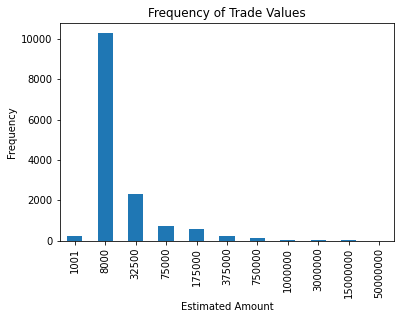

In [31]:
df.groupby('est_amount').count()['type'].plot(kind = 'bar', xlabel = 'Estimated Amount', ylabel = 'Frequency', title = 'Frequency of Trade Values');

#### Bivariate Analysis

We plotted the distribution of estimated trades for each party on the same bar chart. The distribution of trades seems to be significantly different for each party. We noticed Republicans have more trades for higher estimated amounts, which results in a higher mean value for Republicans. Therefore, we decided to test if there's a significant difference between the two distribution for our permutation test. 

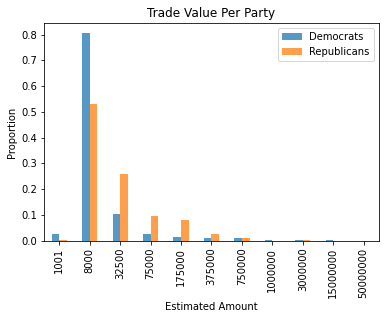

In [32]:
#Plotted the distribution of amount traded by political affiliation 
demo_dist = (final_merge[final_merge['Party']=='Democratic'].groupby('est_amount')['Party'].count() / len(final_merge[final_merge['Party']=='Democratic']['Party'])).rename('Democrats')
rep_dist = (final_merge[final_merge['Party']=='Republican'].groupby('est_amount')['Party'].count() / len(final_merge[final_merge['Party']=='Republican']['Party'])).rename('Republicans')
plot_table = pd.concat([demo_dist,rep_dist],axis = 1)
plot_table = plot_table.fillna(0)
plot_table.plot(kind = 'bar', alpha = 0.75, xlabel = 'Estimated Amount', ylabel = 'Proportion', title = 'Trade Value Per Party');

#### Interesting Aggregates

i. We grouped by owner types and found that joint owner type has the highest total amount traded. Dependent owner type has the lowest total amount traded. 

In [33]:
display(df.groupby('owner').sum())

,est_amount
owner,
dependent,14025500
joint,305742509
self,274316223


We grouped by state and found that California has the highest total amount traded, while Arizona traded the least. In addition, we found that 7 states are not included in the data.

In [34]:
states_copy = df.copy()
# Stripped district keeping only the state abbreviation
states_copy['state'] = states_copy['district'].transform(lambda s: s[:2])
# Used groupby on state, aggregated with sum, and sorted by amount
district_tbl = states_copy.groupby('state').sum().sort_values(by = 'est_amount', ascending = False).reset_index()
display(district_tbl.head())
display(district_tbl.tail())

,state,est_amount
0,CA,158061728
1,WA,140190000
2,NJ,96675505
3,TN,85926500
4,OK,82700000


,state,est_amount
38,MS,245000
39,DC,172500
40,AR,170000
41,LA,72000
42,AZ,48000


We grouped by ticker and found that the top five most traded companies

In [35]:
# Grouped by ticker and sorted by amount
df.groupby('ticker').sum().sort_values(by = 'est_amount', ascending = False).head()

,est_amount
ticker,
MSFT,192693000
AAPL,28142002
AM,10565500
TDDXX,10210000
SHLX,9161000


#### Q 1, 2 answers

Question 1: Who are the top 5 congress people who have made the largest trades?

    1. Suzan K. DelBene
    2. Josh Gottheimer
    3. Mark Green
    4. Kevin Hern
    5. Nancy Pelosi

Question 2: What are the top 5 most traded companies by congress people?

    1. Microsoft
    2. Apple
    3. Antero Midstream
    4. BlackRock    
    5. Shell

In [36]:
# Gets sum of individual's trades and the party they represent
trade_amnts = final_merge.groupby(['representative', 'Party']).sum()
# Gets sum of individual's trades
trade_sum = final_merge.groupby('representative').sum()
# Returns top 5 largest traders
top5_largest_traders = trade_sum['est_amount'].sort_values(ascending = False)[0:5]
# Finds the top 5 most traded tickers
most_traded = final_merge.groupby('ticker')['est_amount'].sum()[1:]
top5_traded = most_traded.sort_values(ascending = False)[:5]
display(pd.DataFrame(top5_largest_traders))
display(pd.DataFrame(top5_traded))

,est_amount
representative,
Suzan K. DelBene,128294000
Josh Gottheimer,90998500
Mark Green,83671500
Kevin Hern,81934000
Nancy Pelosi,67965000


,est_amount
ticker,
MSFT,192693000
AAPL,28142002
AM,10565500
TDDXX,10210000
SHLX,9161000


### Assessment of Missingness

TVD Function!

In [37]:
# returns tvd test statistic
def total_variation_distance(dist1, dist2):
    return np.sum(np.abs(dist1 - dist2)) / 2

In [38]:
# Makes a copy of the original DataFrame for permutation testing
shuffled_df = df.copy()

Defined function to perform permutation test

In [39]:
def permutation_test(col, dependency, shuffled):
    
    shuffled[col + '_missing'] = shuffled[col].isna()

    # Computes the observed tvd
    piv1 = shuffled.pivot_table(index = col + '_missing', columns = dependency, aggfunc = 'count', values = 'amount').fillna(0)
    piv1.loc[False] = piv1.loc[False] / piv1.loc[False].sum()
    piv1.loc[True] = piv1.loc[True] / piv1.loc[True].sum()
    observed_tvd = total_variation_distance(piv1.loc[False],piv1.loc[True])
    # Simulation
    results = []
    for _ in range(100):
        shuffled['shuff'] = pd.Series(np.random.permutation(shuffled[col + '_missing']))
        piv = shuffled.pivot_table(index = 'shuff', columns = dependency, aggfunc = 'count', values = 'amount').fillna(0)
        piv.loc[False] = piv.loc[False] / piv.loc[False].sum()
        piv.loc[True] = piv.loc[True] / piv.loc[True].sum()
        results.append(total_variation_distance(piv.loc[False], piv.loc[True]))
    # Returns a tuple of the pivot table as well as the p-value
    return (piv1.T, (results >= observed_tvd).mean())

Permutation test of the missingness of the ticker column based on the value of owner

p-val: 0.0


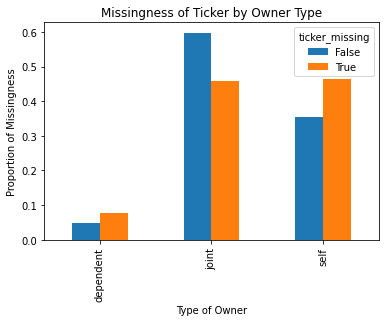

In [40]:
pt = permutation_test('ticker', 'owner', shuffled_df)
pt[0].plot(kind = 'bar', xlabel = 'Type of Owner', ylabel = 'Proportion of Missingness', title = 'Missingness of Ticker by Owner Type');
print('p-val: ' + str(pt[1]))

Permutation test of the missingness of the ticker column based on the value of estimated amount

In [41]:
pt2 = permutation_test('ticker', 'est_amount', shuffled_df)

p-val: 0.0


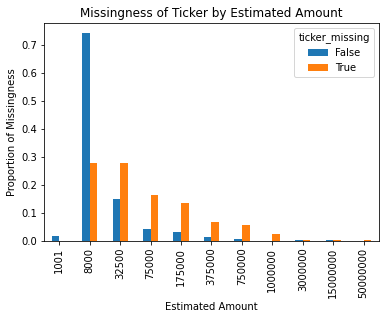

In [42]:
pt2[0].plot(kind = 'bar', xlabel = 'Estimated Amount', ylabel = 'Proportion of Missingness', title = 'Missingness of Ticker by Estimated Amount');
print('p-val: ' + str(pt[1]))

Permutation test of the missingness of the ticker column based on the value of district

In [43]:
pt3 = permutation_test('ticker', 'district', shuffled_df)

p-val: 0.0


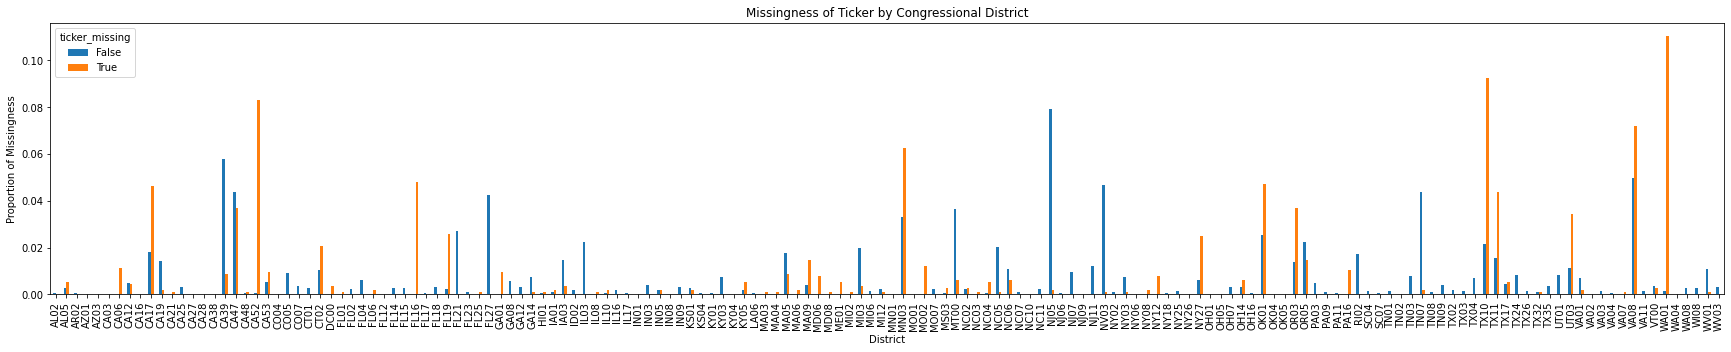

In [44]:
pt3[0].plot(kind = 'bar', figsize = [30,  5], legend = True, xlabel = 'District', ylabel = 'Proportion of Missingness', title = 'Missingness of Ticker by Congressional District');
print('p-val: ' + str(pt3[1]))

Null Hypothesis: the distribution of 'amount' when 'owner' is missing is the same as the distribution of 'amount' when 'owner' is not missing.

Result: p-value = 0

Conclusion: The missingness of the owner column is MAR dependent on the amount invested column.

### Permutation Testing (Q3)

From the bivariate analysis, we found that there seems to be a significant difference between the distribution democratic trades and republican trades. Below is the bivariate analysis again.

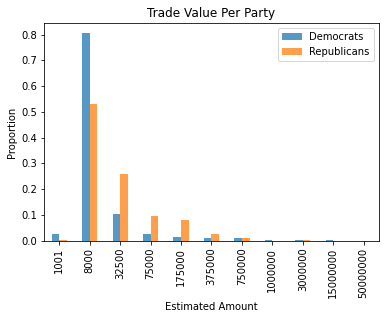

In [46]:
demo_dist = (final_merge[final_merge['Party']=='Democratic'].groupby('est_amount')['Party'].count() / len(final_merge[final_merge['Party']=='Democratic']['Party'])).rename('Democrats')
rep_dist = (final_merge[final_merge['Party']=='Republican'].groupby('est_amount')['Party'].count() / len(final_merge[final_merge['Party']=='Republican']['Party'])).rename('Republicans')
plot_table = pd.concat([demo_dist,rep_dist],axis = 1)
plot_table = plot_table.fillna(0)
#Plotted the distribution of amount traded by political affiliation 
plot_table.plot(kind = 'bar', alpha = 0.75, xlabel = 'Estimated Amount', ylabel = 'Proportion', title = 'Trade Value Per Party');

Question: Do Republicans make larger trades than Democrats?

    H0: In the population, the mean transaction amount for the Democratic and Republican parties have the same distribution. The difference we saw was due to random chance.
    
    H1: In the population, the mean transaction amount for Republicans is higher than that of Democrats, on average.
    
    Test statistic: Signed difference of means between Republican trades and Democrat trades.
    
    Alpha: 0.05
    
    Result: p-value = 0.088


Cleaned data to prepare for permutation testing

In [47]:
# Grabbed only the columns we want to perform the permutation test with
permutation_data = final_merge[['est_amount','Party']]

# Queried for the estimated amounts per specific party
republicans = permutation_data[permutation_data['Party'] == 'Republican']
democrats = permutation_data[permutation_data['Party'] == 'Democratic']

# Estimated amounts per specific party
R_amnts = republicans['est_amount']
D_amnts = democrats['est_amount']

# Difference of signed means
diff_means = lambda x, y: x.mean() - y.mean()

# How much republicans are larger than democrats
observed_diff = diff_means(R_amnts, D_amnts)
observed_diff

13944.390778454574

Permutation testing by simulating 1000 permutations of the party column and storing the difference in means into the results list 

In [54]:
# Simulation
results = []
for _ in range(1000):
    permutation_data['Party'] = np.random.permutation(permutation_data['Party'])
    republicans = permutation_data[permutation_data['Party'] == 'Republican'] 
    democrats = permutation_data[permutation_data['Party'] == 'Democratic']
    R_amnts = republicans['est_amount']
    D_amnts = democrats['est_amount']
    diff = diff_means(R_amnts, D_amnts)
    results.append(diff)

C:\Users\jimmy\AppData\Local\Temp\ipykernel_45292\2057585789.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  permutation_data['Party'] = np.random.permutation(permutation_data['Party'])


P-value computation, standardization, and graphing of the distribution.

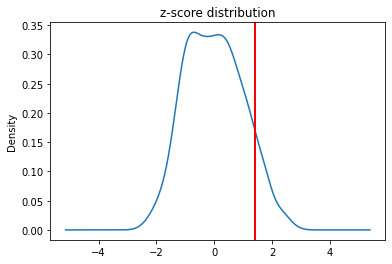

In [55]:
p_val = (np.array(results) >= observed_diff).mean()
standardized_pval = (observed_diff - np.array(results).mean()) / np.array(results).std()
pd.Series((np.array(results) - np.array(results).mean()) / np.array(results).std()).plot(kind = 'kde', title = 'z-score distribution')
plt.axvline(x=standardized_pval, color='red', linewidth=2);

In [56]:
p_val

0.088

#### Conclusion: 
    We observed a p-value of 0.088, which is greater than our alpha of 0.05. Therefore, we don't have enough evidence to reject our null hypothesis. 